In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys, os 
from data_loading import load_runs

In [3]:
from microfit.histogram import Binning, Histogram, RunHistGenerator
from microfit.run_plotter import RunHistPlotter
import matplotlib.pyplot as plt

In [4]:
# First, we need to load the sideband data. We use the numu sideband.
#RUN = ["3"]#3b
RUN = ["3b","4b","4c","4d","5"]  # this can be a list of several runs, i.e. [1,2,3]

rundata_numu, mc_weights_numu, data_pot_numu = load_runs(
    RUN,
    data="muon_sideband",
    truth_filtered_sets=["nue", "drt"],
    loadshowervariables=True,
    loadsystematics=True,
    use_bdt=False,
    # set this to true to let the data loading function know that we are loading numu
    numupresel=True,
    loadnumuvariables=True,
    load_crt_vars=True,
    blinded=False,  # sideband needs to be unblinded to work
    enable_cache=True,
)

In [5]:
for key in rundata_numu:
    rundata_numu[key]['npi'] = rundata_numu[key].eval('npion+npi0')

## defining a numu 0pi selection

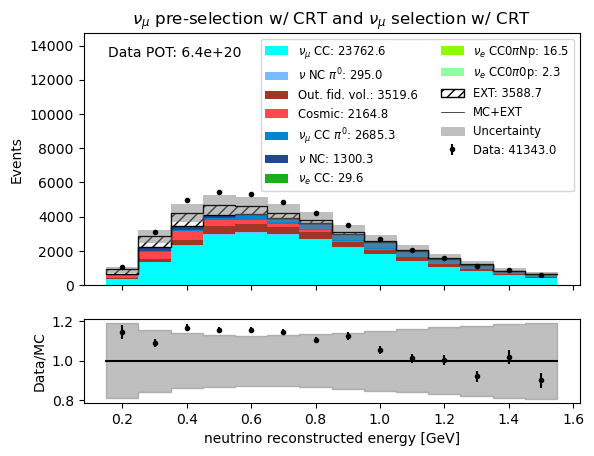

In [6]:
sideband_binning = Binning.from_config("neutrino_energy", 14, (0.15, 1.55), "neutrino reconstructed energy [GeV]")
sideband_generator = RunHistGenerator(
    rundata_numu,
    sideband_binning,
    data_pot=data_pot_numu,
    selection="NUMUCRT",
    preselection="NUMUCRT",
)
sideband_plotter = RunHistPlotter(sideband_generator)
ax = sideband_plotter.plot(include_multisim_errors=True, show_data_mc_ratio=True, add_ext_error_floor=False,
                           category_column="category")[0]
ax.set_ylim(0.0, ax.get_ylim()[1] * 1.5)
plt.savefig("plots/reco_e_muincl.pdf")

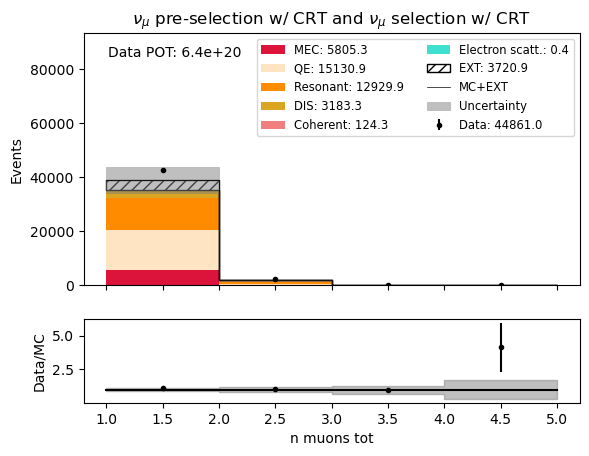

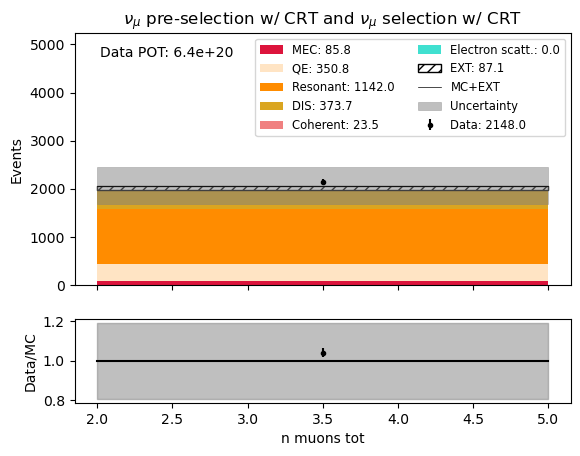

In [7]:
sideband_binnings = [Binning.from_config("n_muons_tot", 4, (1, 5), "n muons tot"),
                     Binning.from_config("n_muons_tot", 1, (2, 5), "n muons tot")]
for sideband_binning in sideband_binnings:
    sideband_generator = RunHistGenerator(
        rundata_numu,
        sideband_binning,
        data_pot=data_pot_numu,
        selection="NUMUCRT",
        preselection="NUMUCRT",
    )
    sideband_plotter = RunHistPlotter(sideband_generator)
    ax = sideband_plotter.plot(include_multisim_errors=True, show_data_mc_ratio=True, add_ext_error_floor=False,
                               category_column="interaction")[0]
    ax.set_ylim(0.0, ax.get_ylim()[1] * 1.2)

(0.0, 50712.640110489985)

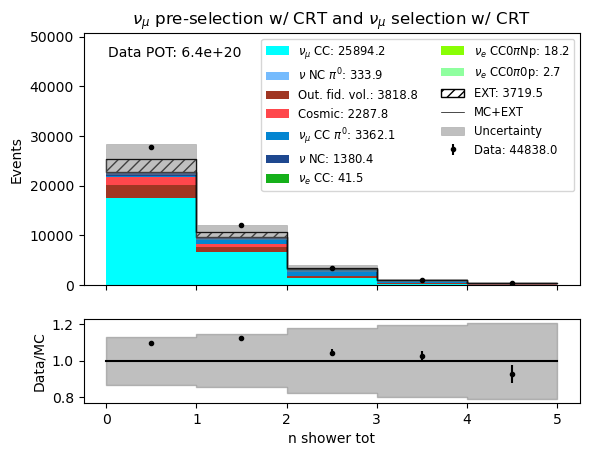

In [8]:
sideband_binning = Binning.from_config("n_showers_tot", 5, (0, 5), "n shower tot")
sideband_generator = RunHistGenerator(
    rundata_numu,
    sideband_binning,
    data_pot=data_pot_numu,
    selection="NUMUCRT",
    preselection="NUMUCRT",
)
sideband_plotter = RunHistPlotter(sideband_generator)
ax = sideband_plotter.plot(include_multisim_errors=True, show_data_mc_ratio=True, add_ext_error_floor=False,
                           category_column="category")[0]
ax.set_ylim(0.0, ax.get_ylim()[1] * 1.)

print_tot_pred_norm: [0.65519996 0.27758338 0.05435531 0.01071318 0.00214817]


/Users/cerati/miniforge3/envs/pelee/lib/python3.7/site-packages/matplotlib/axes/_base.py:2480: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


(0.0, 39613.8550746495)

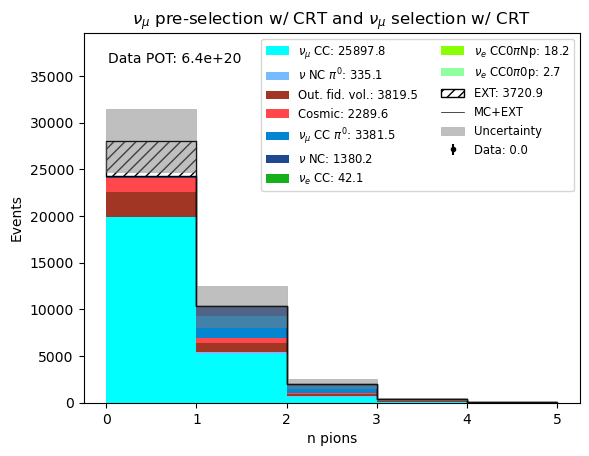

In [9]:
sideband_binning = Binning.from_config("npi", 5, (0, 5), "n pions")
sideband_generator = RunHistGenerator(
    rundata_numu,
    sideband_binning,
    data_pot=data_pot_numu,
    selection="NUMUCRT",
    preselection="NUMUCRT",
    showdata=False
)
sideband_plotter = RunHistPlotter(sideband_generator)
ax = sideband_plotter.plot(include_multisim_errors=True, print_tot_pred_norm=True, add_ext_error_floor=False,
                           category_column="category")
ax.set_ylim(0.0, ax.get_ylim()[1] * 1.2)

/Users/cerati/Notebooks/PELEE24/microfit/histogram/run_hist_generator.py:113: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["dataset_name"] = k
/Users/cerati/Notebooks/PELEE24/microfit/histogram/run_hist_generator.py:114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["dataset_name"] = df["dataset_name"].astype("category")


print_tot_pred_norm: [7.38208980e-01 2.28527907e-01 2.91194554e-02 3.68203588e-03
 4.61621351e-04]


(0.0, 48349.21058714744)

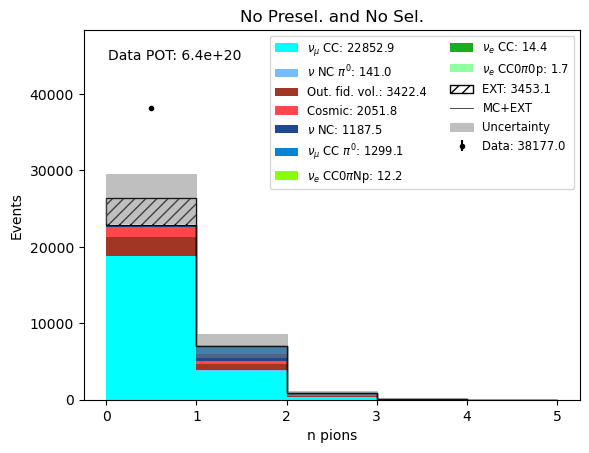

In [10]:
q = sideband_generator.get_selection_query("NUMUCRT0PI","NUMUCRT")
q = q.replace('n_showers_tot == 0','n_showers_tot <= 1')
sel_rundata_numu = {}
for key in rundata_numu:
        sel_rundata_numu[key] = rundata_numu[key].query(q, engine="python")
sideband_binning = Binning.from_config("npi", 5, (0, 5), "n pions")
sideband_generator = RunHistGenerator(
    sel_rundata_numu,
    sideband_binning,
    data_pot=data_pot_numu,
    selection=None,
    preselection=None,
    showdata=False
)
sideband_plotter = RunHistPlotter(sideband_generator)
ax = sideband_plotter.plot(include_multisim_errors=True, print_tot_pred_norm=True, add_ext_error_floor=False,
                           category_column="category")
ax.set_ylim(0.0, ax.get_ylim()[1] * 1.2)

print_tot_pred_norm: [8.04133185e-01 1.75917613e-01 1.76738394e-02 2.02442993e-03
 2.50932019e-04]


(0.0, 28374.252235579897)

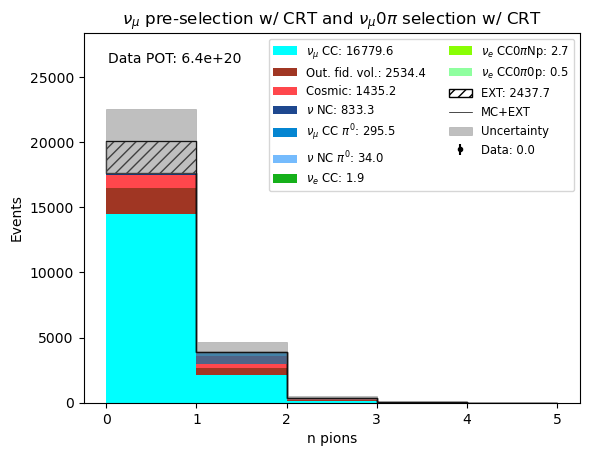

In [11]:
sideband_binning = Binning.from_config("npi", 5, (0, 5), "n pions")
sideband_generator = RunHistGenerator(
    rundata_numu,
    sideband_binning,
    data_pot=data_pot_numu,
    selection="NUMUCRT0PI",
    preselection="NUMUCRT",
    showdata=False
)
sideband_plotter = RunHistPlotter(sideband_generator)
ax = sideband_plotter.plot(include_multisim_errors=True, print_tot_pred_norm=True, add_ext_error_floor=False,
                           category_column="category")
ax.set_ylim(0.0, ax.get_ylim()[1] * 1.2)

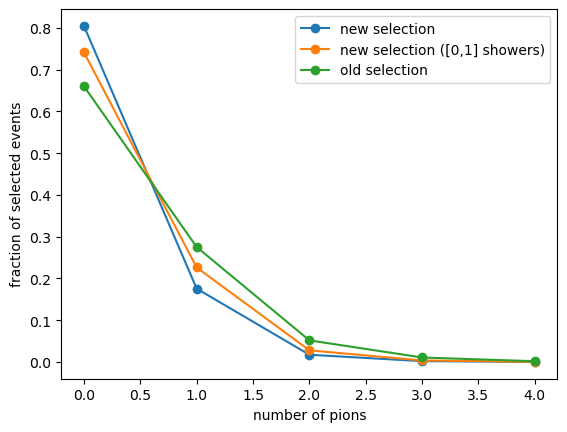

In [19]:
oldsel = [0.66018782, 0.27526086, 0.05180216, 0.01083632, 0.00191284]
newsel01shr = [7.41440431e-01, 2.26360281e-01, 2.79673242e-02, 3.79768072e-03, 4.34283109e-04]
newsel = [8.04616879e-01, 1.75642419e-01, 1.74034541e-02, 2.09647262e-03, 2.40774913e-04]

plt.plot(newsel,'o-',label='new selection')
plt.plot(newsel01shr,'o-',label='new selection ([0,1] showers)')
plt.plot(oldsel,'o-',label='old selection')
plt.legend()
plt.xlabel("number of pions")
plt.ylabel("fraction of selected events")
plt.savefig("plots/npi_musel.pdf")
plt.show()

## defining Np and 0p numu 0pi selections

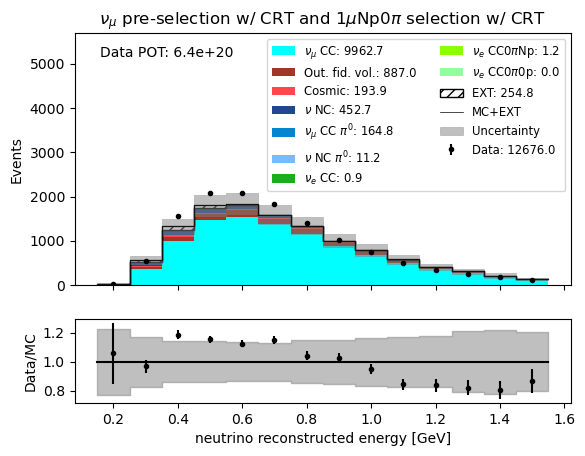

In [13]:
sideband_binning = Binning.from_config("neutrino_energy", 14, (0.15, 1.55), "neutrino reconstructed energy [GeV]")
sideband_generator = RunHistGenerator(
    rundata_numu,
    sideband_binning,
    data_pot=data_pot_numu,
    selection="NUMUCRTNP0PI",
    preselection="NUMUCRT",
)
sideband_plotter = RunHistPlotter(sideband_generator)
ax = sideband_plotter.plot(include_multisim_errors=True, show_data_mc_ratio=True, add_ext_error_floor=False,
                           category_column="category")[0]
ax.set_ylim(0.0, ax.get_ylim()[1] * 1.5)
plt.savefig("plots/reco_e_1muNp0pi.pdf")

/Users/cerati/Notebooks/PELEE24/microfit/histogram/run_hist_generator.py:113: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["dataset_name"] = k
/Users/cerati/Notebooks/PELEE24/microfit/histogram/run_hist_generator.py:114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["dataset_name"] = df["dataset_name"].astype("category")


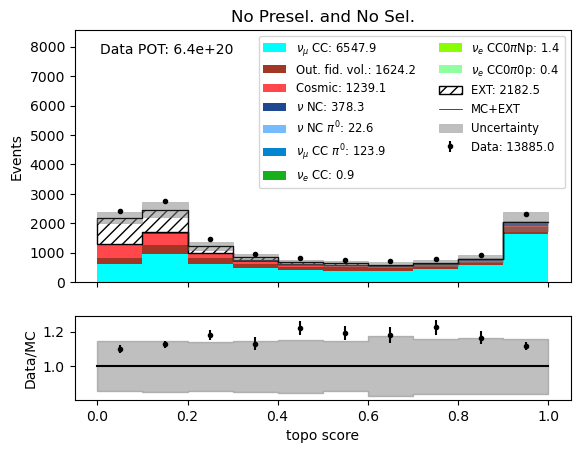

In [14]:
q = sideband_generator.get_selection_query("NUMUCRT0P0PI","NUMUCRT")
q = q.replace(' and topological_score > 0.2','')
sel_rundata_numu = {}
for key in rundata_numu:
        sel_rundata_numu[key] = rundata_numu[key].query(q, engine="python")

#sideband_binning = Binning.from_config("muon_phi", 8, (-4, 4), "muon phi")
#sideband_binning = Binning.from_config("muon_length", 10, (0, 500), "muon length")
sideband_binning = Binning.from_config("topological_score", 10, (0, 1), "topo score")
#sideband_binning = Binning.from_config("trk1_dir_y_alltk", 10, (-1, 1), "trk1 dir y")

sideband_generator = RunHistGenerator(
    sel_rundata_numu,
    sideband_binning,
    data_pot=data_pot_numu,
    selection=None,
    preselection=None,
)
sideband_plotter = RunHistPlotter(sideband_generator)
ax = sideband_plotter.plot(include_multisim_errors=True, show_data_mc_ratio=True, add_ext_error_floor=False,
                           category_column="category")[0]
ax.set_ylim(0.0, ax.get_ylim()[1] * 1.7)
plt.savefig("plots/topological_score_1mu0p0pi.pdf")

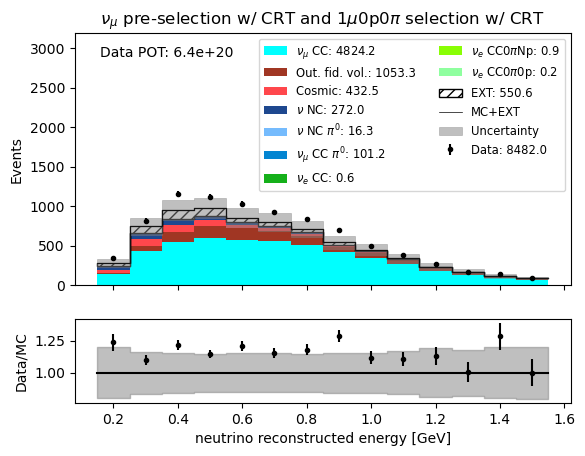

In [15]:
sideband_binning = Binning.from_config("neutrino_energy", 14, (0.15, 1.55), "neutrino reconstructed energy [GeV]")
sideband_generator = RunHistGenerator(
    rundata_numu,
    sideband_binning,
    data_pot=data_pot_numu,
    selection="NUMUCRT0P0PI",
    preselection="NUMUCRT",
)
#print(sideband_generator.get_selection_query("NUMUCRT0P0PI","NUMUCRT"))
sideband_plotter = RunHistPlotter(sideband_generator)
ax = sideband_plotter.plot(include_multisim_errors=True, show_data_mc_ratio=True, add_ext_error_floor=False,
                           category_column="category")[0]
ax.set_ylim(0.0, ax.get_ylim()[1] * 1.5)
plt.savefig("plots/reco_e_1mu0p0pi.pdf")

## 1e0p loose 2-shower sidband constraint selection

In [16]:
RUN = ["3b","4b","4c","4d","5"]  # this can be a list of several runs, i.e. [1,2,3]
rundata, mc_weights, data_pot = load_runs(
    RUN,
    data="two_shr_sideband",  # which data to load
    # truth_filtered_sets=["nue", "drt", "nc_pi0", "cc_pi0", "cc_nopi", "cc_cpi", "nc_nopi", "nc_cpi"],
    # Which truth-filtered MC sets to load in addition to the main MC set. At least nu_e and dirt
    # are highly recommended because the statistics at the final level of the selection are very low.
    truth_filtered_sets=["nue", "drt"],
    # Choose which additional variables to load. Which ones are required may depend on the selection
    # you wish to apply.
    loadpi0variables=True,
    loadshowervariables=True,
    loadrecoveryvars=False,
    loadsystematics=True,
    load_crt_vars=True,
    # Load the nu_e set one more time with the LEE weights applied
    load_lee=False,
    # With the cache enabled, by default the loaded dataframes will be stored as HDF5 files
    # in the 'cached_dataframes' folder. This will speed up subsequent loading of the same data.
    enable_cache=True,
    # Since this is Open Data, we are allowed to unblind the data. By default, the data is blinded.
    blinded=False,
)

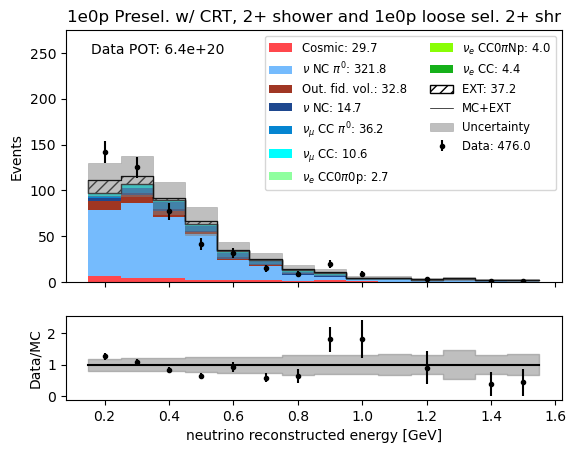

In [17]:
sideband_binning = Binning.from_config("reco_e", 14, (0.15, 1.55), "neutrino reconstructed energy [GeV]")
sideband_generator = RunHistGenerator(
    rundata,
    sideband_binning,
    data_pot=data_pot,
    selection="ZPLOOSETWOSHR",
    preselection="ZPTwoShrCRT",
)
sideband_plotter = RunHistPlotter(sideband_generator)
sideband_plotter.plot(include_multisim_errors=True, show_data_mc_ratio=True, add_ext_error_floor=False,
                      category_column="category")
plt.savefig("plots/reco_e_2shr_loose_1e0p0pi.pdf")

In [18]:
# this defines the selection. We still need to discuss the variables, which may change given the new signal model